In [113]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
panel = data.get_data_google(['AAPL','MSFT','GS','XOM','GE', 'CVX', 'IBM', 'GE', 'MRK','PG'], start='1/1/2016' , end='11/18/16')

In [115]:
stocks = panel.Close

In [116]:
stocks.fillna(method='ffill', inplace=True)

In [117]:
for c in stocks.columns:
    stocks[c] = np.log(stocks[c]/stocks[c].shift(1))
stocks.head()    

,AAPL,CVX,GE,GS,IBM,MRK,MSFT,PG,XOM
Date,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.025379,0.008517,0.000976,-0.017368,-0.000736,0.012686,0.004552,0.003185,0.008484
2016-01-06,-0.019764,-0.040306,-0.016069,-0.024716,-0.005018,-0.013830,-0.018332,-0.009714,-0.008355
2016-01-07,-0.043121,-0.036079,-0.043235,-0.031217,-0.017237,-0.008814,-0.035402,-0.008772,-0.016136
2016-01-08,0.005274,-0.010778,-0.018113,-0.004139,-0.009301,-0.017081,0.003062,-0.015802,-0.020409


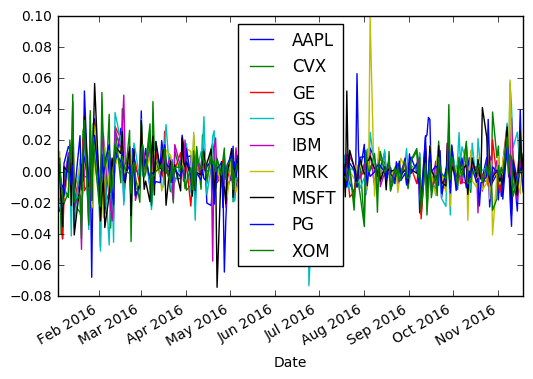

In [118]:
stocks.plot()

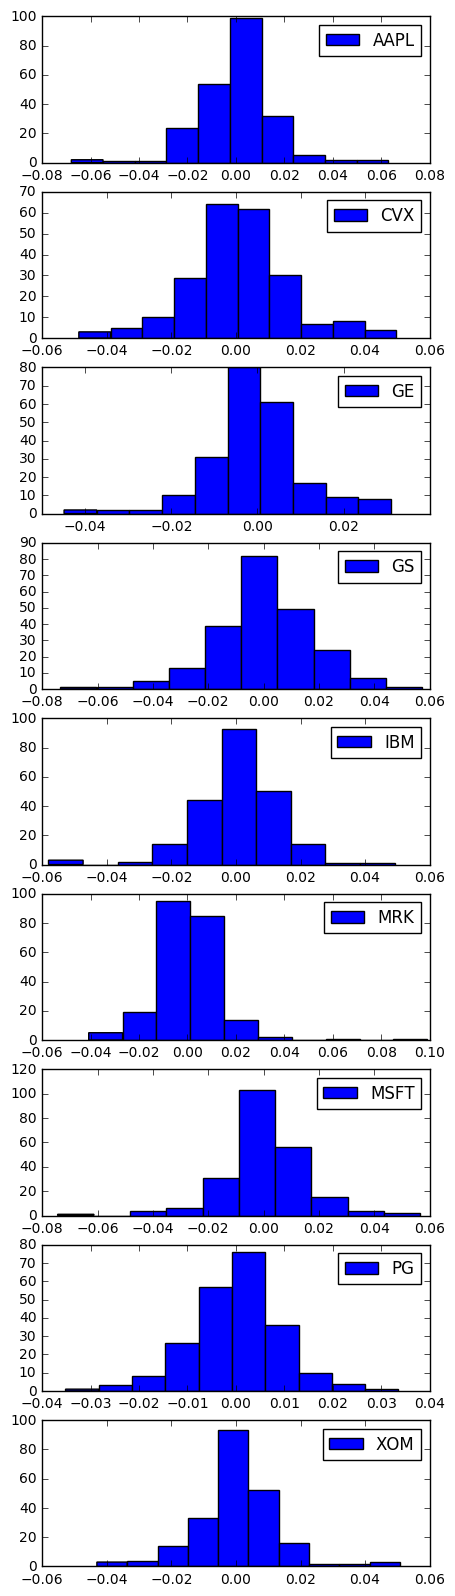

In [119]:
plt.figure(figsize=(5,20))
for i,s in enumerate(stocks.columns):
    #ax = plt.subplot(stocks.shape[1]%3 +1, 3 , (i)%3 +1)
    ax = plt.subplot(stocks.shape[1], 1 , i+1)
    ax.hist(stocks[s],range=(stocks[s].min(),stocks[s].max()))
    ax.legend(loc='best')
plt.show()

In [120]:
stocks.describe(include='all')

C:\Program Files\Anaconda3\Lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,AAPL,CVX,GE,GS,IBM,MRK,MSFT,PG,XOM
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.000197,0.000929,-0.000006,0.000774,0.000745,0.000741,0.000435,0.000204,0.000433
std,0.015590,0.015557,0.011072,0.017176,0.012970,0.013522,0.014840,0.009372,0.012453
min,-0.067965,-0.048649,-0.044918,-0.073373,-0.058041,-0.040795,-0.074411,-0.035174,-0.043061
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.062940,0.049650,0.031062,0.057204,0.049130,0.099013,0.056571,0.033557,0.050837


In [123]:
stocks.to_excel('returns.xls')